<a href="https://colab.research.google.com/github/Jaise152/CDK/blob/master/GAM_Assignmment_V1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Threshold model

Linear threshold model is one of the model proposed to model spread of infomration. The spread of infomration will differ with the choise of node which are activated initially. For this assignemnt I am considering Degree Centality and Eigen Centrality to select the node which is be activated initially

# Importing libraries and loading Graph

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline

Mounting Google Drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


Loading graph edgelist csv file from Google drive

In [3]:
LastFM = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GAM Assignment/lastfm_asia_edges.csv')

In [9]:
LastFM.head()

,node_1,node_2
0,0,747
1,1,4257
2,1,2194
3,1,580
4,1,6478


Creating graph from edgelist using networkx

In [10]:
LastFm_Graph = nx.from_pandas_edgelist(LastFM,source='node_1',target='node_2')

In [13]:
#Checking graph object type
type(LastFm_Graph)

networkx.classes.graph.Graph

Converintg the graph to undirected as specified in the SNAP data set

In [18]:
LastFm_Graph_Undirected = LastFm_Graph.to_undirected()

Fixing node distance for plotting graph 

In [29]:
pos = nx.spring_layout(LastFm_Graph_Undirected)

# Inpecting Graph

Checking number of edges, nodes and degree

In [19]:
nx.info(LastFm_Graph_Undirected)

'Name: \nType: Graph\nNumber of nodes: 7624\nNumber of edges: 27806\nAverage degree:   7.2943'

Listing nodes of graph

In [20]:
LastFm_Graph_Undirected.nodes()

NodeView((0, 747, 1, 4257, 2194, 580, 6478, 1222, 5735, 7146, 2204, 126, 2639, 2, 562, 1492, 6, 5303, 7128, 4154, 5179, 3, 1728, 4560, 5060, 1351, 6503, 7089, 4319, 6095, 272, 4433, 2900, 3381, 5943, 2107, 6940, 2013, 6046, 5823, 4, 5770, 5, 5454, 5856, 667, 6180, 598, 870, 3079, 1834, 6283, 7340, 7279, 342, 4405, 1462, 1284, 1551, 3291, 167, 7, 177, 6243, 7589, 2854, 6931, 6250, 428, 2142, 8, 1686, 9, 4481, 1795, 2660, 6053, 246, 3843, 6441, 366, 10, 5489, 11, 5240, 618, 2412, 1325, 4919, 12, 5274, 3807, 13, 1794, 3971, 1223, 6152, 5385, 1509, 524, 4770, 1937, 7315, 1817, 6298, 2266, 3557, 5857, 866, 2789, 3559, 4904, 6565, 5355, 620, 110, 2835, 3316, 6712, 1850, 4860, 4606, 14, 5862, 2155, 6438, 3086, 15, 3530, 7580, 3029, 4375, 16, 7296, 2626, 131, 6323, 1799, 3103, 5578, 7435, 1677, 5072, 4008, 3410, 6446, 4184, 5725, 1349, 5088, 6544, 2530, 1956, 38, 550, 6567, 4968, 1005, 6126, 1905, 3699, 773, 1016, 2751, 3324, 766, 6101, 17, 6105, 4242, 7237, 1334, 951, 1337, 3165, 18, 6372, 40

Counting number of nodes

In [21]:
len(LastFm_Graph_Undirected.nodes())

7624

Checking the edges

In [22]:
LastFm_Graph_Undirected.edges()

EdgeView([(0, 747), (747, 4704), (747, 3683), (747, 5892), (747, 2020), (747, 5610), (747, 6363), (747, 3855), (1, 4257), (1, 2194), (1, 580), (1, 6478), (1, 1222), (1, 5735), (1, 7146), (1, 2204), (1, 126), (1, 2639), (4257, 180), (4257, 217), (4257, 295), (4257, 409), (4257, 445), (4257, 510), (4257, 1000), (4257, 1698), (4257, 1788), (4257, 1856), (4257, 2196), (4257, 3020), (4257, 3066), (4257, 3501), (4257, 4152), (4257, 4864), (4257, 6919), (4257, 4811), (4257, 4821), (4257, 5595), (4257, 6431), (4257, 6562), (4257, 5286), (4257, 6248), (4257, 6996), (4257, 6399), (2194, 78), (2194, 758), (2194, 1216), (2194, 1304), (2194, 1328), (2194, 1444), (2194, 1599), (2194, 1701), (2194, 1725), (2194, 3520), (2194, 3853), (2194, 2707), (2194, 2197), (2194, 4632), (2194, 4955), (2194, 2204), (2194, 3938), (2194, 3495), (2194, 7464), (2194, 3605), (2194, 3633), (2194, 4925), (6478, 1352), (6478, 2196), (6478, 2705), (6478, 3022), (6478, 3039), (6478, 3055), (6478, 3317), (6478, 3509), (6478,

Counting number of edges

In [23]:
len(LastFm_Graph_Undirected.edges())

27806

Degree view of Graph

In [32]:
nx.degree(LastFm_Graph_Undirected)

DegreeView({0: 1, 747: 8, 1: 10, 4257: 27, 2194: 23, 580: 1, 6478: 22, 1222: 15, 5735: 8, 7146: 4, 2204: 25, 126: 6, 2639: 11, 2: 7, 562: 5, 1492: 8, 6: 20, 5303: 16, 7128: 10, 4154: 9, 5179: 2, 3: 18, 1728: 11, 4560: 13, 5060: 22, 1351: 7, 6503: 11, 7089: 22, 4319: 33, 6095: 19, 272: 4, 4433: 26, 2900: 3, 3381: 38, 5943: 6, 2107: 11, 6940: 12, 2013: 11, 6046: 17, 5823: 26, 4: 1, 5770: 5, 5: 1, 5454: 72, 5856: 10, 667: 35, 6180: 19, 598: 11, 870: 8, 3079: 11, 1834: 19, 6283: 7, 7340: 10, 7279: 12, 342: 8, 4405: 1, 1462: 20, 1284: 11, 1551: 10, 3291: 5, 167: 20, 7: 8, 177: 7, 6243: 1, 7589: 4, 2854: 119, 6931: 13, 6250: 6, 428: 1, 2142: 18, 8: 1, 1686: 3, 9: 8, 4481: 1, 1795: 50, 2660: 3, 6053: 1, 246: 3, 3843: 3, 6441: 14, 366: 3, 10: 1, 5489: 6, 11: 5, 5240: 6, 618: 7, 2412: 10, 1325: 12, 4919: 20, 12: 2, 5274: 102, 3807: 23, 13: 29, 1794: 17, 3971: 8, 1223: 33, 6152: 5, 5385: 1, 1509: 54, 524: 172, 4770: 15, 1937: 106, 7315: 11, 1817: 28, 6298: 17, 2266: 12, 3557: 29, 5857: 81, 866: 

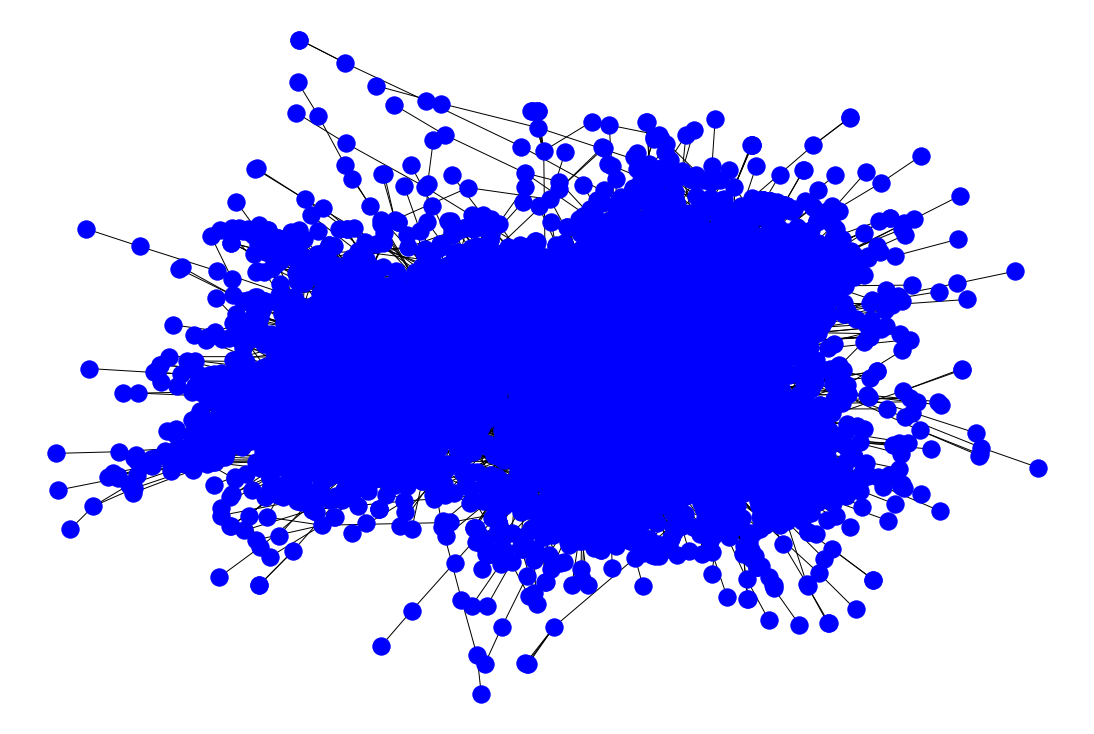

In [30]:
fig = plt.figure(figsize=(15,10))
nx.draw(LastFm_Graph_Undirected, pos=pos,
            node_color = 'b')

# Calulating Centrality

Calculating degree centrality

In [33]:
degree_node =[]
Most_influential_Degree_Centrality = nx.degree_centrality(LastFm_Graph_Undirected)
for w in sorted(Most_influential_Degree_Centrality, key=Most_influential_Degree_Centrality.get, reverse=True)[:10]:
  #print (w,Most_influential_Degree_Centrality[w] )
  degree_node.append(w)

Top influencial node based on degree centrality

In [35]:
degree_node

[7237, 3530, 4785, 524, 3450, 2510, 3597, 2854, 6101, 5127]

Calculating Eigen Centrality

In [37]:
eigen_node = []
Most_influential_link = nx.eigenvector_centrality(LastFm_Graph_Undirected)
for w in sorted(Most_influential_link, key=Most_influential_link.get, reverse=True)[:10]:
  #print (w,Most_influential_link[w] )
  eigen_node.append(w)

Top influencial node based on eigen centrality

In [38]:
eigen_node

[7237, 3240, 3597, 763, 378, 2083, 1334, 3544, 4809, 2734]

# Linear Threshold Model implementation

Initialization of variables

In [42]:
A = np.array(nx.adjacency_matrix(LastFm_Graph_Undirected).todense())
n=A.shape[0]

In [43]:
theta = 1.0/50

In [59]:
index=eigen_node

In [69]:
InitialActive = np.zeros((n,), dtype=bool)
InitialActive[index] = 1

Function to model Influence propagation using Linear threshold Model

In [75]:
def InfluenceProp(A, InitialActive, theta, NoIteration = np.inf):
    deg = np.sum(A,axis=0, dtype=float)
    i = 1 # iteration
    
    Activated = InitialActive.copy()    
    while i < NoIteration:
        i+=1
        
        # currently inactive nodes
        Inactive = np.where(Activated == 0)[0]    
        # Currently active nodes
        idx = np.sum(A[np.ix_(Activated==1, Activated==0)], axis=0) / deg[Activated==0] > theta
        if np.any(idx):
            Activated[Inactive[idx]] = 1
        else:
            break

    return Activated 

Function to plot influence propagation

In [64]:
def ShowIteration(LastFm_Graph_Undirected, initActive, resultActive, pos):
    fig = plt.figure(figsize=(15,10))
    plt.subplot(1,2,1)
    nx.draw(LastFm_Graph_Undirected, pos=pos,
            nodelist=np.where(initActive)[0].tolist(),
            node_color = 'r')
    nx.draw(LastFm_Graph_Undirected, pos=pos,
            nodelist=np.where(1-initActive)[0].tolist(),
            node_color = 'b')

    plt.subplot(1,2,2)
    nx.draw(LastFm_Graph_Undirected, pos=pos,
            nodelist=np.where(resultActive)[0].tolist(),
            node_color = 'r')
    nx.draw(LastFm_Graph_Undirected, pos=pos,
            nodelist=np.where(1-resultActive)[0].tolist(),
            node_color = 'b')
    
    

# Information diffusion 

Executing

In [76]:
# Run 
resultActive = InfluenceProp(A, InitialActive, theta, NoIteration = 9)



Visualize graph

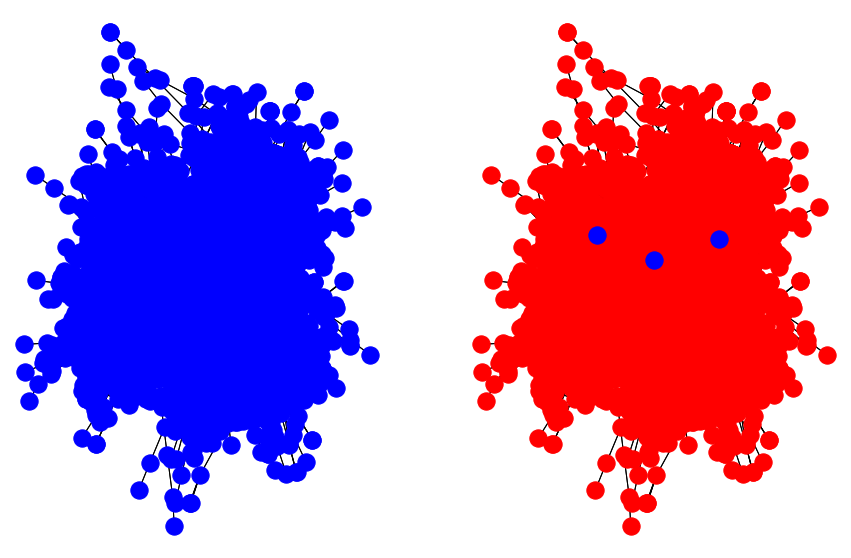

In [77]:
# Look 
ShowIteration(LastFm_Graph_Undirected, InitialActivation, resultActive, pos)

# Experimenting with Information propogation

Function to get number of node activated at give time

In [80]:
def activation(node,time_to_run,theta):
  A = np.array(nx.adjacency_matrix(LastFm_Graph).todense())
  n=A.shape[0]
  idx = node
  initActive = np.zeros((n,), dtype=bool)
  initActive[idx] = 1
  time = []
  node = []
  for i in range(time_to_run):
    resultActive = InfluenceProp(A, initActive, theta, NoIteration = i)
    Active_node = np.sum(resultActive)
    time.append(i)
    node.append(Active_node)  
  return time,node

Verifying output of function

In [81]:
activation(eigen_node,10,1/50)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 10, 115, 811, 3425, 6241, 7388, 7585, 7617, 7621])

## Eigen Centrality vs Degree Centraity

Activating nodes

In [117]:
x1,y1 = activation(eigen_node,25,1/10)
x2,y2 = activation(degree_node,25,1/10)


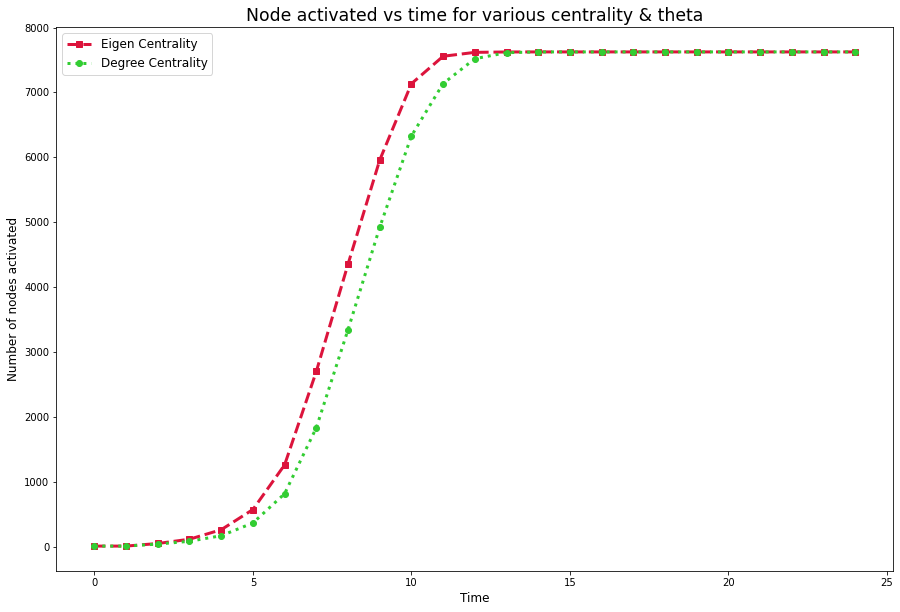

In [125]:
fig = plt.figure(figsize=(15,10))
plt.title('Node activated vs time for various centrality & theta', fontsize='xx-large')
plt.ylabel('Number of nodes activated',fontsize='large')
plt.xlabel('Time',fontsize='large')
plt.plot( x1, y1,'bs',linestyle='dashed',color='crimson',label ="Eigen Centrality",linewidth = 3)
plt.plot( x2, y2,'ro',linestyle='dotted',color='limegreen',label ='Degree Centrality',linewidth =3)
plt.legend(loc="upper left", fontsize = 'large')
plt.show()

## Eigen Centrality in various threshold

In [129]:
x3,y3 = activation(eigen_node,40,1/10)
x4,y4 = activation(eigen_node,40,1/8)
x5,y5 = activation(eigen_node,40,1/6)
x6,y6 = activation(eigen_node,40,1/4)


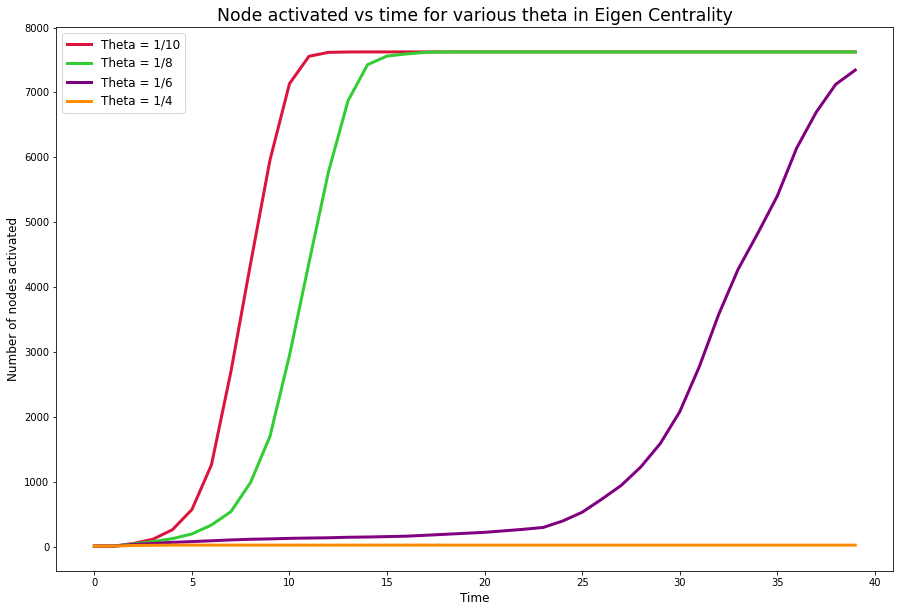

In [139]:
fig = plt.figure(figsize=(15,10))
plt.title('Node activated vs time for various theta in Eigen Centrality', fontsize='xx-large')
plt.ylabel('Number of nodes activated',fontsize='large')
plt.xlabel('Time',fontsize='large')
plt.plot( x3, y3,linestyle='solid',color='crimson',label ="Theta = 1/10",linewidth = 3)
plt.plot( x4, y4,linestyle='solid',color='limegreen',label ='Theta = 1/8',linewidth =3)
plt.plot( x5, y5,linestyle='solid',color='purple',label ="Theta = 1/6",linewidth = 3)
plt.plot( x6, y6,linestyle='solid',color='darkorange',label ='Theta = 1/4',linewidth =3)
plt.legend(loc="upper left", fontsize = 'large')
plt.show()

## Degree Centrality in various threshold

In [131]:
x7,y7 = activation(degree_node,40,1/10)
x8,y8 = activation(degree_node,40,1/8)
x9,y9 = activation(degree_node,40,1/6)
x10,y10 = activation(degree_node,40,1/4)


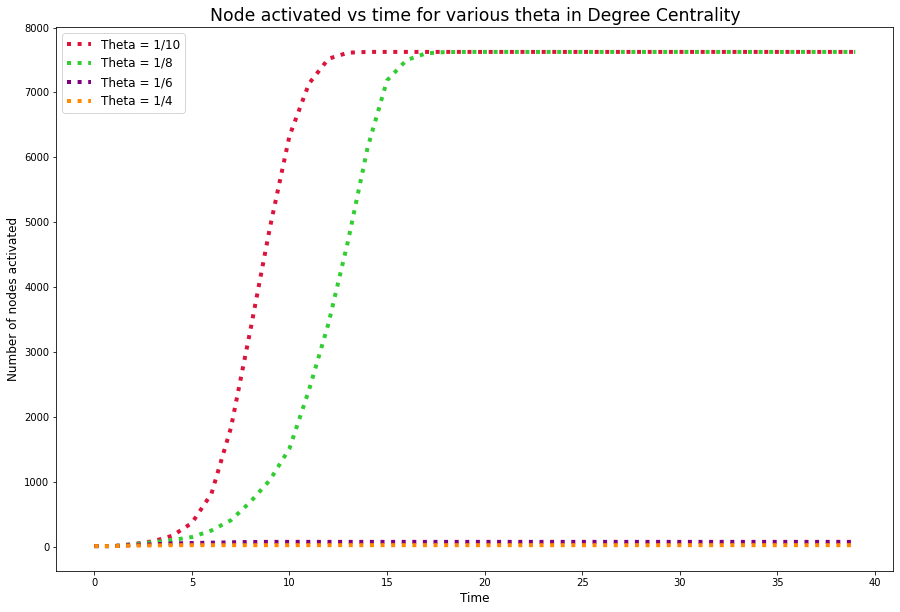

In [138]:
fig = plt.figure(figsize=(15,10))
plt.title('Node activated vs time for various theta in Degree Centrality', fontsize='xx-large')
plt.ylabel('Number of nodes activated',fontsize='large')
plt.xlabel('Time',fontsize='large')
plt.plot( x7, y7,linestyle='dotted',color='crimson',label ="Theta = 1/10",linewidth = 4)
plt.plot( x8, y8,linestyle='dotted',color='limegreen',label ='Theta = 1/8',linewidth =4)
plt.plot( x9, y9,linestyle='dotted',color='purple',label ="Theta = 1/6",linewidth = 4)
plt.plot( x10, y10,linestyle='dotted',color='darkorange',label ='Theta = 1/4',linewidth =4)
plt.legend(loc="upper left", fontsize = 'large')
plt.show()

# Observation

1. Nodes choosen by Eigen Centality measure is the best centrality measure for information propoagation when compared with node choosen by Degree centrality measure
2. The node chosen by both Eigen Centrality and Degree centrality are different with only one common node.
3. The information will propogate slowly or will not propogate if the threshold is low. 